In [29]:
import cdflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
path = 'DATA/dmsp-f16_20110502.cdf'
cdflib.cdf_to_xarray(path)

<xarray.Dataset>
Dimensions:                    (Epoch: 86400, dim0: 3, CHANNEL_ENERGIES: 19,
                                dim1: 19)
Coordinates:
  * Epoch                      (Epoch) float64 6.347e+13 6.347e+13 ... 6.347e+13
  * CHANNEL_ENERGIES           (CHANNEL_ENERGIES) float32 3e+04 ... 30.0
Dimensions without coordinates: dim0, dim1
Data variables: (12/26)
    SC_ECI                     (Epoch, dim0) float64 -273.6 ... -5.473e+03
    SC_ECI_LABEL               (dim0) <U5 'x_ECI' 'y_ECI' 'z_ECI'
    SC_GEOCENTRIC_LAT          (Epoch) float64 -80.07 -80.1 ... -49.25 -49.19
    SC_GEOCENTRIC_LON          (Epoch) float64 37.77 37.47 37.16 ... 287.8 287.8
    SC_GEOCENTRIC_R            (Epoch) float64 7.235e+03 7.235e+03 ... 7.23e+03
    SC_AACGM_LAT               (Epoch) float64 -74.23 -74.2 ... -40.65 -40.6
    ...                         ...
    ION_DIFF_ENERGY_FLUX       (Epoch, CHANNEL_ENERGIES) float32 2.868e+04 .....
    ION_DIFF_ENERGY_FLUX_STD   (Epoch, CHANNEL_ENERGIES) float32 1.118 ... nan
    ION_TOTAL_ENERGY_FLUX      (Epoch) float32 6.907e+09 6.961e+09 ... 0.0
    ION_TOTAL_ENERGY_FLUX_STD  (Epoch) float32 0.3838 0.3954 0.3604 ... 1.84 nan
    ION_AVG_ENERGY             (Epoch) float32 7.712e+03 6.878e+03 ... nan
    ION_AVG_ENERGY_STD         (Epoch) float32 0.5086 0.5146 0.5117 ... 2.66 nan
Attributes: (12/26)
    Project:                     DMSP
    Source_name:                 dmsp-f16
    Discipline:                  ['Space Physics>Magnetospheric Science', 'Sp...
    Data_type:                   precipitating-electrons-ions
    Descriptor:                  ssj
    File_naming_convention:      source_descriptor_datatype_yyyyMMdd
    ...                          ...
    MODS:                        This is version 1, beta.
    LINK_TEXT:                   NGDC Solar & Terrestrial Physics Satellite D...
    LINK_TITLE:                  NGDC STP Satellite Data Services
    HTTP_LINK:                   http://www.ngdc.noaa.gov/stp/satellite/satda...
    DWELL_TIME:                  The count integration time at each energy st...
    VERSION:                      1.1.2

In [70]:
cdf_file = cdflib.CDF(path)
ion = cdf_file['ION_DIFF_ENERGY_FLUX']
ele = cdf_file['ELE_DIFF_ENERGY_FLUX']
channel = cdf_file['CHANNEL_ENERGIES']

In [57]:
from datetime import datetime


a = cdflib.cdfepoch.unixtime(cdf_file['Epoch'])
date = [datetime.utcfromtimestamp(aa) for aa in a]

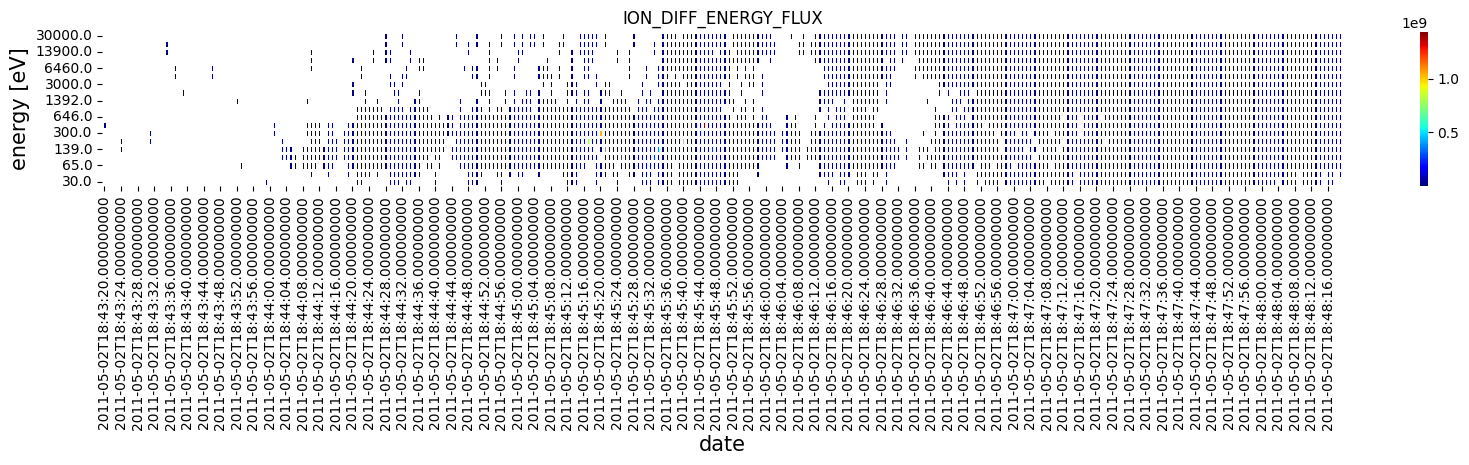

In [90]:
st = 67400
et = st + 300
df_ion = pd.DataFrame(ion.T[:, st:et], columns=date[st:et], index=channel)
df_ion_mask = (df_ion == 0)
plt.figure(figsize=(20,2))
sns.heatmap(df_ion, linewidths = 1,cmap = "jet", mask = df_ion_mask)
plt.title('ION_DIFF_ENERGY_FLUX')
plt.xlabel('date', fontsize=15)
plt.ylabel('energy [eV]', fontsize=15);

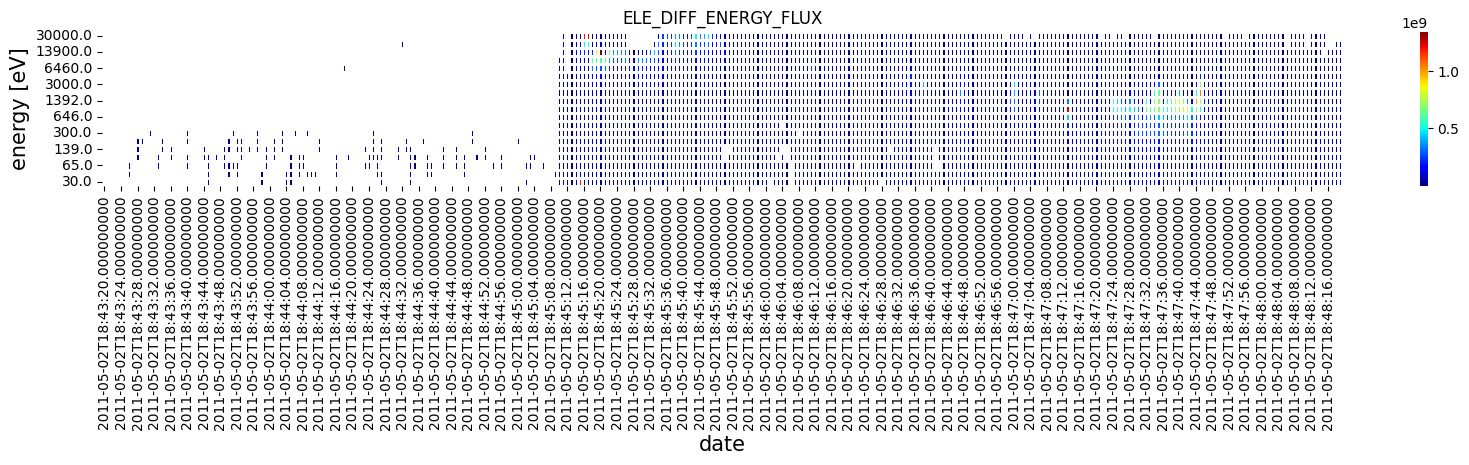

In [89]:
st = 67400
et = st + 300

df_ele = pd.DataFrame(ele.T[:, st:et], columns=date[st:et], index=channel)
df_ele_mask = (df_ele == 0)
plt.figure(figsize=(20,2))
sns.heatmap(df_ele, linewidths = 1,cmap = "jet", mask = df_ele_mask)
plt.title('ELE_DIFF_ENERGY_FLUX')
plt.xlabel('date', fontsize=15)
plt.ylabel('energy [eV]', fontsize=15);

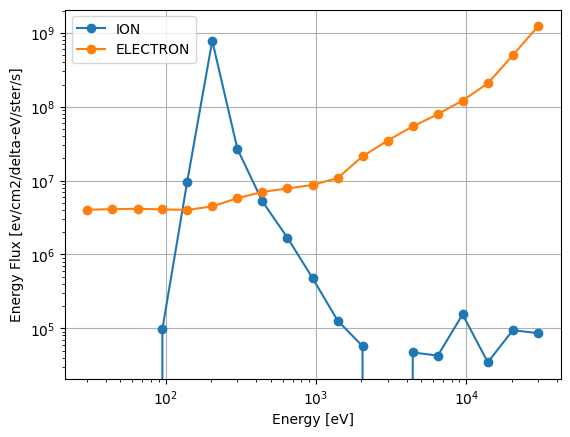

In [97]:
def plot_fig(id, ion, ele):
    plt.plot(channel, ion[id], marker='o', label='ION')
    plt.plot(channel, ele[id], marker='o', label='ELECTRON')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Energy [eV]')
    plt.ylabel('Energy Flux [ev/cm2/delta-eV/ster/s]')
    plt.grid()
    plt.legend()

plot_fig(67517, ion, ele)

In [92]:
channel/1000

array([30.   , 20.4  , 13.9  ,  9.45 ,  6.46 ,  4.4  ,  3.   ,  2.04 ,
        1.392,  0.949,  0.646,  0.44 ,  0.3  ,  0.204,  0.139,  0.095,
        0.065,  0.044,  0.03 ], dtype=float32)

In [61]:
df = np.array([ion.max(axis=1), ele.max(axis=1)])
df = pd.DataFrame(df.T, columns=['ION', 'ELECTRON'], index=date)

In [45]:
df

,ION,ELECTRON
2010-01-01 00:00:00,0.000000,0.000000e+00
2010-01-01 00:00:01,0.000000,0.000000e+00
2010-01-01 00:00:02,963065.437500,5.105612e+05
2010-01-01 00:00:03,0.000000,0.000000e+00
2010-01-01 00:00:04,0.000000,3.380347e+06
...,...,...
2010-01-01 23:59:55,0.000000,1.313410e+06
2010-01-01 23:59:56,0.000000,7.880457e+05
2010-01-01 23:59:57,0.000000,4.012872e+05
2010-01-01 23:59:58,0.000000,1.546359e+06


In [62]:
df_min = df.groupby(pd.Grouper(freq='min')).mean()

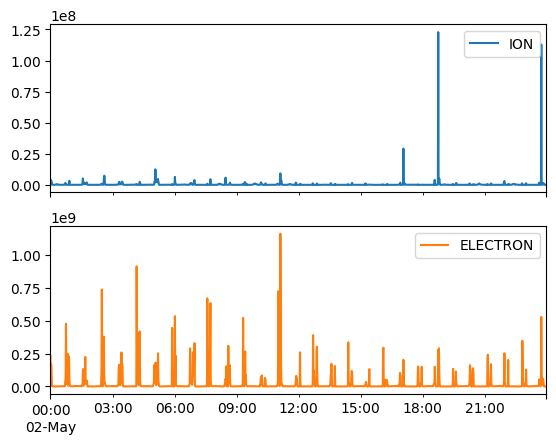

In [63]:
df_min.plot(subplots=True)
plt.legend();